In [2]:
# import all the necessary libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# import the linear regression model

from sklearn.linear_model import LinearRegression

In [4]:
# create an instance of the linear regression estimator

model = LinearRegression()

In [6]:
# load the flights dataset from seaborn

df = sns.load_dataset('flights')

# check all the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [7]:
# lets see the first 5 rows of the dataset

df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [8]:
# lets find the unique years
df['year'].unique()

array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960], dtype=int64)

In [9]:
# lets find the unique months 
df['month'].unique()

['Jan', 'Feb', 'Mar', 'Apr', 'May', ..., 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Length: 12
Categories (12, object): ['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec']

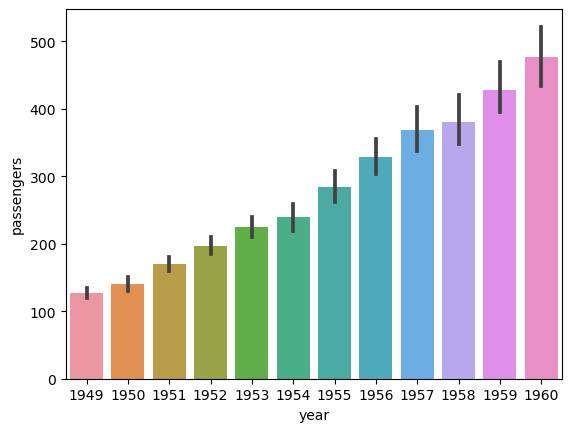

In [10]:
# lets plot a bar plot between year and passengers 
sns.barplot(x = 'year', y = 'passengers', data = df)
plt.show()

In [11]:
# divide the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['year'], df['passengers'], train_size = 0.7)

In [12]:
# lets see the first five X-train data points
X_train.head()

62    1954
90    1956
20    1950
60    1954
5     1949
Name: year, dtype: int64

In [13]:
# lets see the first five X-test data points 
X_test.head()

48     1953
10     1949
114    1958
81     1955
56     1953
Name: year, dtype: int64

In [14]:
# lets see the first five y-train data points
y_train.head()

62    235
90    413
20    158
60    204
5     135
Name: passengers, dtype: int64

In [15]:
# lets see the first five y-test data points
y_test.head()

48     196
10     104
114    491
81     274
56     237
Name: passengers, dtype: int64

In [17]:
# convert the 1-dimensional to 2-dimensional data points
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [18]:
# train the model
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# find the predictions of the model using test data points
y_pred = model.predict(X_test)

In [20]:
# lets see the predictions of the model
y_pred

array([233.57669868, 102.83416369, 397.00486742, 298.94796617,
       233.57669868, 135.51979744, 429.69050116, 364.31923367,
       200.89106493, 298.94796617, 233.57669868, 135.51979744,
       102.83416369, 168.20543118, 364.31923367, 168.20543118,
       168.20543118, 397.00486742, 429.69050116, 364.31923367,
       298.94796617, 462.37613491, 266.26233243, 135.51979744,
       298.94796617, 200.89106493, 331.63359992, 364.31923367,
       266.26233243, 200.89106493, 462.37613491, 298.94796617,
       200.89106493, 331.63359992, 429.69050116, 364.31923367,
       364.31923367, 135.51979744, 102.83416369, 397.00486742,
       233.57669868, 266.26233243, 429.69050116, 102.83416369])

In [36]:
# import the metrics for evaluation
from sklearn.metrics import r2_score

In [37]:
# lets evaluate
r2 = r2_score(y_test, y_pred)
r2

0.8561053382217296

C:\Users\Madhavz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Madhavz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Madhavz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Madhavz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

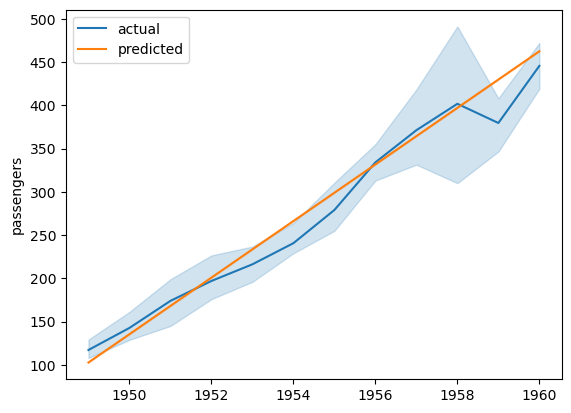

In [40]:
# lets plot graph between actual and predicted 
sns.lineplot(x = X_test.ravel(), y = y_test, label = 'actual')
sns.lineplot(x = X_test.ravel(), y = y_pred, label = 'predicted')
plt.show()